# Libraries

In [1]:
import requests

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


pd.set_option('display.max_columns', None) # display all columns in DF

# Import data

In [2]:
df = pd.read_csv('output_regression_org.csv', sep = '~')
df

C:\Users\sebas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date,unique_id,generic_units_reimbursed_sum,generic_total_amount_reimbursed_adj_sum,units_reimbursed_sum,total_amount_reimbursed_adj_sum,col_temp,running_count_generics,number_of_first_entrance,running_count_from_fourth_entrance,running_count_from_third_entrance,running_count_from_second_entrance,running_count_from_start,first_nda,labeler_name,labeler_name_count,dataset,labeler_code,product_code,year,quarter,product_ndc,generic_name,brand_name,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,marketing_start_date,product_id,application_number,brand_name_base,marketing_end_date,active_ingredients,route,pharm_class,brand_name_suffix,dea_schedule,is_original_packager,name,strength,NDA #,Alimentary Tract And Metabolism,Antiinfectives For Systemic Use,Antineoplastic And Immunomodulating Agents,"Antiparasitic Products, Insecticides And Repellents",Blood And Blood Forming Organs,Cardiovascular System,Dermatologicals,Genito Urinary System And Sex Hormones,Musculo-Skeletal System,Nervous System,Respiratory System,Sensory Organs,"Systemic Hormonal Preparations, Excl. Sex Hormones And Insulins",Various,units_reimbursed,total_amount_reimbursed_adj,price_per_unit_adj,unique_substitute,running_count_unique_substitute,running_count_event,generic_share_units_reimbursed_sum,generic_share_total_amount_reimbursed_adj_sum
0,2020-10-01,"(calcium, magnesium, potassium, and sodium oxy...",0.0,0.0,38610.000,1.143621e+06,1.0,0,1.0,0.0,0.0,0.0,1.0,1.0,"Jazz Pharmaceuticals, Inc.",1,State Drug Utilization Data 2020,68727,150,2020,4,68727-150,"(CALCIUM, MAGNESIUM, POTASSIUM, AND SODIUM OXY...",XYWAV,True,"[{'package_ndc': '68727-150-01', 'description'...",20221231.0,"{'manufacturer_name': ['Jazz Pharmaceuticals, ...",NDA,SOLUTION,78a7a9e9-9f25-4f8a-8f1e-a6c6420801c3,HUMAN PRESCRIPTION DRUG,20201102,68727-150_78a7a9e9-9f25-4f8a-8f1e-a6c6420801c3,NDA212690,XYWAV,NaN,"[{'name': 'CALCIUM OXYBATE', 'strength': '.5 g...",ORAL,"['Central Nervous System Depressant [EPC]', 'C...",NaN,CIII,True,"['CALCIUM OXYBATE', 'MAGNESIUM OXYBATE', 'POTA...","['.5 g/mL', '.5 g/mL', '.5 g/mL', '.5 g/mL']",212690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38610.000,1.143621e+06,29.619826,NaN,NaN,NaN,0.0,0.0
1,2021-01-01,"(calcium, magnesium, potassium, and sodium oxy...",0.0,0.0,303030.000,8.858441e+06,2.0,0,1.0,0.0,0.0,0.0,2.0,1.0,"Jazz Pharmaceuticals, Inc.",1,State Drug Utilization Data 2021,68727,150,2021,1,68727-150,"(CALCIUM, MAGNESIUM, POTASSIUM, AND SODIUM OXY...",XYWAV,True,"[{'package_ndc': '68727-150-01', 'description'...",20221231.0,"{'manufacturer_name': ['Jazz Pharmaceuticals, ...",NDA,SOLUTION,78a7a9e9-9f25-4f8a-8f1e-a6c6420801c3,HUMAN PRESCRIPTION DRUG,20201102,68727-150_78a7a9e9-9f25-4f8a-8f1e-a6c6420801c3,NDA212690,XYWAV,NaN,"[{'name': 'CALCIUM OXYBATE', 'strength': '.5 g...",ORAL,"['Central Nervous System Depressant [EPC]', 'C...",NaN,CIII,True,"['CALCIUM OXYBATE', 'MAGNESIUM OXYBATE', 'POTA...","['.5 g/mL', '.5 g/mL', '.5 g/mL', '.5 g/mL']",212690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303030.000,8.858441e+06,29.232883,NaN,NaN,NaN,0.0,0.0
2,2019-04-01,(daunorubicin and cytarabine) liposome-injecti...,0.0,0.0,43.234,3.285997e+05,1.0,0,1.0,0.0,0.0,0.0,1.0,1.0,"Jazz Pharmaceuticals, Inc.",1,State Drug Utilization Data 2019,68727,745,2019,2,68727-745,(DAUNORUBICIN AND CYTARABINE) LIPOSOME,VYXEOS,True,"[{'package_ndc': '68727-745-01', 'description'...",20221231.0,"{'manufacturer_name': ['Jazz Pharmaceuticals, ...",NDA,"INJECTION, POWDER, LYOPHILIZED, FOR SUSPENSION",31000140-b8f4-4608-903a-d755b8067c68,HUMAN PRESCRIPTION DRUG,20170803,68727-745_31000140-b8f4-4608-903a-d755b8067c68,NDA209401,VYXEOS,NaN,"[{'name': 'CYTARABINE', 'strength': '100 mg/20...",INTRAVENOUS,['Anthracycline Topoisomerase Inhibitor [EPC]'...,NaN,NaN,True,"['CYTARABINE', 'DAUNORUBICIN']","['100 mg/20mL', '44 mg/20mL']",209401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.234,3.285997e+05,7600.491715

# Number of producer versus price per. unit

In [3]:
df_figure_1 = df.groupby("labeler_name_count")["price_per_unit_adj"].mean()
df_figure_1 = pd.DataFrame(df_figure_1.reset_index())
df_figure_1['ln_price_per_unit_adj'] = np.log(df_figure_1['price_per_unit_adj'])
#df_figure_1

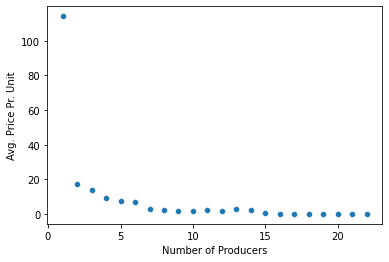

In [4]:
Intro_fig = sns.scatterplot(x="labeler_name_count", y="price_per_unit_adj", data=df_figure_1)
Intro_fig.set(xlabel = "Number of Producers", ylabel = "Avg. Price Pr. Unit")
Intro_fig = Intro_fig.get_figure()
#Intro_fig.savefig("Avg_price_and_number_of_producers.png")

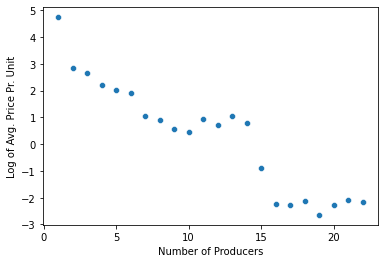

In [5]:
Intro_fig = sns.scatterplot(x="labeler_name_count", y="ln_price_per_unit_adj", data=df_figure_1)
Intro_fig.set(xlabel = "Number of Producers", ylabel = "Log of Avg. Price Pr. Unit")
Intro_fig = Intro_fig.get_figure()
#Intro_fig.savefig("log_of_avg_price_and_number_of_producers.png")

# Specific drug figure

In [27]:
df.head(1)

,date,unique_id,generic_units_reimbursed_sum,generic_total_amount_reimbursed_adj_sum,units_reimbursed_sum,total_amount_reimbursed_adj_sum,col_temp,running_count_generics,number_of_first_entrance,running_count_from_fourth_entrance,running_count_from_third_entrance,running_count_from_second_entrance,running_count_from_start,first_nda,labeler_name,labeler_name_count,dataset,labeler_code,product_code,year,quarter,product_ndc,generic_name,brand_name,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,marketing_start_date,product_id,application_number,brand_name_base,marketing_end_date,active_ingredients,route,pharm_class,brand_name_suffix,dea_schedule,is_original_packager,name,strength,NDA #,Alimentary Tract And Metabolism,Antiinfectives For Systemic Use,Antineoplastic And Immunomodulating Agents,"Antiparasitic Products, Insecticides And Repellents",Blood And Blood Forming Organs,Cardiovascular System,Dermatologicals,Genito Urinary System And Sex Hormones,Musculo-Skeletal System,Nervous System,Respiratory System,Sensory Organs,"Systemic Hormonal Preparations, Excl. Sex Hormones And Insulins",Various,units_reimbursed,total_amount_reimbursed_adj,price_per_unit_adj,unique_substitute,running_count_unique_substitute,running_count_event,generic_share_units_reimbursed_sum,generic_share_total_amount_reimbursed_adj_sum
0,2020-10-01,"(calcium, magnesium, potassium, and sodium oxy...",0.0,0.0,38610.0,1.143621e+06,1.0,0,1.0,0.0,0.0,0.0,1.0,1.0,"Jazz Pharmaceuticals, Inc.",1,State Drug Utilization Data 2020,68727,150,2020,4,68727-150,"(CALCIUM, MAGNESIUM, POTASSIUM, AND SODIUM OXY...",XYWAV,True,"[{'package_ndc': '68727-150-01', 'description'...",20221231.0,"{'manufacturer_name': ['Jazz Pharmaceuticals, ...",NDA,SOLUTION,78a7a9e9-9f25-4f8a-8f1e-a6c6420801c3,HUMAN PRESCRIPTION DRUG,20201102,68727-150_78a7a9e9-9f25-4f8a-8f1e-a6c6420801c3,NDA212690,XYWAV,NaN,"[{'name': 'CALCIUM OXYBATE', 'strength': '.5 g...",ORAL,"['Central Nervous System Depressant [EPC]', 'C...",NaN,CIII,True,"['CALCIUM OXYBATE', 'MAGNESIUM OXYBATE', 'POTA...","['.5 g/mL', '.5 g/mL', '.5 g/mL', '.5 g/mL']",212690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38610.0,1.143621e+06,29.619826,NaN,NaN,NaN,0.0,0.0


In [32]:
df.loc[df['unique_id'] == "alprazolam-tablet, extended release-oral-['.5 mg/1']"]

,date,unique_id,generic_units_reimbursed_sum,generic_total_amount_reimbursed_adj_sum,units_reimbursed_sum,total_amount_reimbursed_adj_sum,col_temp,running_count_generics,number_of_first_entrance,running_count_from_fourth_entrance,running_count_from_third_entrance,running_count_from_second_entrance,running_count_from_start,first_nda,labeler_name,labeler_name_count,dataset,labeler_code,product_code,year,quarter,product_ndc,generic_name,brand_name,finished,packaging,listing_expiration_date,openfda,marketing_category,dosage_form,spl_id,product_type,marketing_start_date,product_id,application_number,brand_name_base,marketing_end_date,active_ingredients,route,pharm_class,brand_name_suffix,dea_schedule,is_original_packager,name,strength,NDA #,Alimentary Tract And Metabolism,Antiinfectives For Systemic Use,Antineoplastic And Immunomodulating Agents,"Antiparasitic Products, Insecticides And Repellents",Blood And Blood Forming Organs,Cardiovascular System,Dermatologicals,Genito Urinary System And Sex Hormones,Musculo-Skeletal System,Nervous System,Respiratory System,Sensory Organs,"Systemic Hormonal Preparations, Excl. Sex Hormones And Insulins",Various,units_reimbursed,total_amount_reimbursed_adj,price_per_unit_adj,unique_substitute,running_count_unique_substitute,running_count_event,generic_share_units_reimbursed_sum,generic_share_total_amount_reimbursed_adj_sum
3754,2007-07-01,"alprazolam-tablet, extended release-oral-['.5 ...",155161.0,494966.177435,165699.0,5.386674e+05,0.0,2,1.0,0.0,1.0,1.0,18.0,1.0,"Actavis Pharma, Inc.",3,State Drug Utilization Data 2007,228,3083,2007,3,0228-3083,ALPRAZOLAM,Alprazolam Extended Release,True,"[{'package_ndc': '0228-3083-06', 'description'...",20221231.0,"{'manufacturer_name': ['Actavis Pharma, Inc.']...",ANDA,"TABLET, EXTENDED RELEASE",16f458db-cf90-46fa-87fb-743c97db56ca,HUMAN PRESCRIPTION DRUG,20070312,0228-3083_16f458db-cf90-46fa-87fb-743c97db56ca,ANDA078056,Alprazolam,NaN,"[{'name': 'ALPRAZOLAM', 'strength': '.5 mg/1'}]",ORAL,"['Benzodiazepine [EPC]', 'Benzodiazepines [CS]']",Extended Release,CIV,True,['ALPRAZOLAM'],['.5 mg/1'],78056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,657.0,1.974171e+03,3.004827,NaN,NaN,0.0,0.936403,0.918872
3755,2007-07-01,"alprazolam-tablet, extended release-oral-['.5 ...",155161.0,494966.177435,165699.0,5.386674e+05,0.0,2,1.0,0.0,1.0,1.0,18.0,1.0,Greenstone LLC,2,State Drug Utilization Data 2007,59762,57,2007,3,59762-0057,ALPRAZOLAM,Alprazolam XR,True,"[{'package_ndc': '59762-0057-1', 'description'...",20221231.0,"{'manufacturer_name': ['Greenstone LLC'], 'rxc...",NDA AUTHORIZED GENERIC,"TABLET, EXTENDED RELEASE",b61cc8c8-f45f-467e-9685-5a7ca43379f4,HUMAN PRESCRIPTION DRUG,20030117,59762-0057_b61cc8c8-f45f-467e-9685-5a7ca43379f4,NDA021434,Alprazolam,NaN,"[{'name': 'ALPRAZOLAM', 'strength': '.5 mg/1'}]",ORAL,"['Benzodiazepine [EPC]', 'Benzodiazepines [CS]']",XR,CIV,True,['ALPRAZOLAM'],['.5 mg/1'],21434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,154504.0,4.929920e+05,3.190804,NaN,NaN,0.0,0.936403,0.918872
3756,2007-07-01,"alprazolam-tablet, extended release-oral-['.5 ...",155161.0,494966.177435,165699.0,5.386674e+05,0.0,2,1.0,0.0,1.0,1.0,18.0,1.0,Pharmacia & Upjohn Company LLC,1,State Drug Utilization Data 2007,9,57,2007,3,0009-0057,ALPRAZOLAM,Xanax XR,True,"[{'package_ndc': '0009-0057-07', 'description'...",20221231.0,{'manufacturer_name': ['Pharmacia & Upjohn Com...,NDA,"TABLET, EXTENDED RELEASE",d5218653-0bfe-44de-9449-79ffce3c1cb1,HUMAN PRESCRIPTION DRUG,20030117,0009-0057_d5218653-0bfe-44de-9449-79ffce3c1cb1,NDA021434,Xanax,NaN,"[{'name': 'ALPRAZOLAM', 'strength': '.5 mg/1'}]",ORAL,"['Benzodiazepine [EPC]', 'Benzodiazepines [CS]']",XR,CIV,True,['ALPRAZOLAM'],['.5 mg/1'],21434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10538.0,4.370124e+04,4.147015,NaN,NaN,0.0,0.936403,0.918872
3757,2007-10-01,"alprazolam-tablet, extended release-oral-['.5 ...",156423.0,496308.523620,169427.0,5.498151e+05,1.0,2,1.0,0.0,2.0,2.0,19.0,1.0,"Actav

In [34]:
df_figure = df.loc[df['unique_id'] == "alprazolam-tablet, extended release-oral-['.5 mg/1']"]
df_figure['date'] = pd.to_datetime(df_figure['date'].str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')

<ipython-input-34-06db4bb817a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_figure['date'] = pd.to_datetime(df_figure['date'].str.replace(r'(Q\d) (\d+)', r'\2-\1'), errors='coerce')


In [35]:
df_figure = df_figure.groupby(['date', 'generic_name', 'labeler_name', ])['price_per_unit_adj'].mean()
df_figure = df_figure.reset_index()
df_figure['ln_price_per_unit_adj'] = np.log(df_figure['price_per_unit_adj'])

In [36]:
df_figure

,date,generic_name,labeler_name,price_per_unit_adj,ln_price_per_unit_adj
0,2003-04-01,ALPRAZOLAM,Pharmacia & Upjohn Company LLC,5.612952,1.725077
1,2003-07-01,ALPRAZOLAM,Pharmacia & Upjohn Company LLC,4.440054,1.490667
2,2003-10-01,ALPRAZOLAM,Pharmacia & Upjohn Company LLC,4.533566,1.511509
3,2004-01-01,ALPRAZOLAM,Pharmacia & Upjohn Company LLC,4.530724,1.510882
4,2004-04-01,ALPRAZOLAM,Pharmacia & Upjohn Company LLC,4.487123,1.501212
...,...,...,...,...,...
201,2020-10-01,ALPRAZOLAM,Aurobindo Pharma Limited,0.399911,-0.916513
202,2020-10-01,ALPRAZOLAM,Greenstone LLC,0.370576,-0.992697
203,2021-01-01,ALPRAZOLAM,"Actavis Pharma, Inc.",0.399778,-0.916846
204,2021-01-01,ALPRAZOLAM,Aurobindo Pharma Limited,0.389928,-0.941793


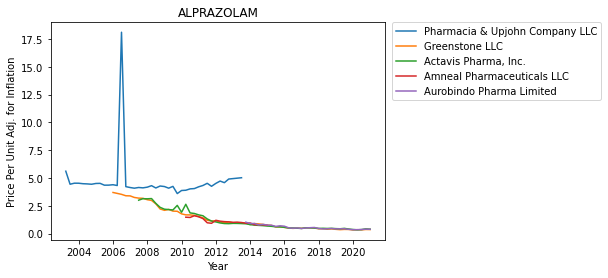

In [37]:
p = sns.lineplot(data = df_figure, x = 'date', y = 'price_per_unit_adj', hue = 'labeler_name', ci = 0)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
p.set(xlabel = 'Year', ylabel = 'Price Per Unit Adj. for Inflation', title = df_figure['generic_name'][0])
p = p.get_figure()
#p.savefig("Fig_one_drug.png",bbox_inches="tight")

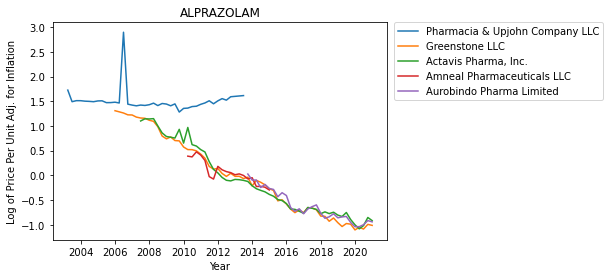

In [39]:
p = sns.lineplot(data = df_figure, x = 'date', y = 'ln_price_per_unit_adj', hue = 'labeler_name', ci = 0)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
p.set(xlabel = 'Year', ylabel = 'Log of Price Per Unit Adj. for Inflation', title = df_figure['generic_name'][0])
p = p.get_figure()
#p.savefig("Fig_one_drug_log.png", bbox_inches="tight")

# Event figure - average and log of average

In [40]:
df_fig_event = df.dropna(subset = ['running_count_event'])
df_fig_event = df_fig_event.groupby('running_count_event')['price_per_unit_adj'].mean()
df_fig_event = df_fig_event.reset_index()
df_fig_event['ln_price_per_unit_adj'] = np.log(df_fig_event['price_per_unit_adj'])

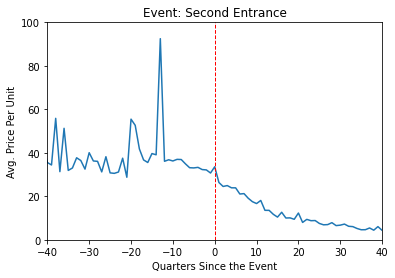

In [41]:
p_event = sns.lineplot(data = df_fig_event, x = 'running_count_event', y = 'price_per_unit_adj')
p_event.set(xlabel = 'Quarters Since the Event', ylabel = 'Avg. Price Per Unit', title ='Event: Second Entrance')
plt.axvline(0, color = "red", lw = 1, ls='--')
plt.xlim([-40, 40])
plt.ylim([0, 100])
p_event = p_event.get_figure()
#p_event.savefig("Fig_event.png", bbox_inches="tight")

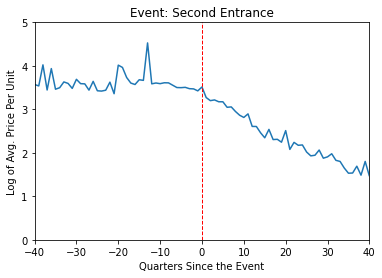

In [42]:
p_event = sns.lineplot(data = df_fig_event, x = 'running_count_event', y = 'ln_price_per_unit_adj')
p_event.set(xlabel = 'Quarters Since the Event', ylabel = 'Log of Avg. Price Per Unit', title ='Event: Second Entrance')
plt.axvline(0, color = "red", lw = 1, ls='--')
plt.xlim([-40, 40])
plt.ylim([0, 5])
p_event = p_event.get_figure()
#p_event.savefig("Fig_event_log.png", bbox_inches="tight")